In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
od.download('https://www.kaggle.com/datasets/nikhil1e9/loan-default')

Skipping, found downloaded files in "./loan-default" (use force=True to force download)


In [4]:
os.listdir('loan-default')

['Loan_default.csv']

In [5]:
data=pd.read_csv('/content/loan-default/Loan_default.csv')

In [6]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [8]:
data['LoanID'].value_counts().sum()

np.int64(255347)

In [9]:
data=data.drop('LoanID',axis=1)

In [10]:
for i in data.columns[data.dtypes=='object']:
  print(i)
  print(data[i].value_counts())
  print(data[i].nunique())

Education
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
4
EmploymentType
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
4
MaritalStatus
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
3
HasMortgage
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
2
HasDependents
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
2
LoanPurpose
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
5
HasCoSigner
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64
2


Histplot

Age


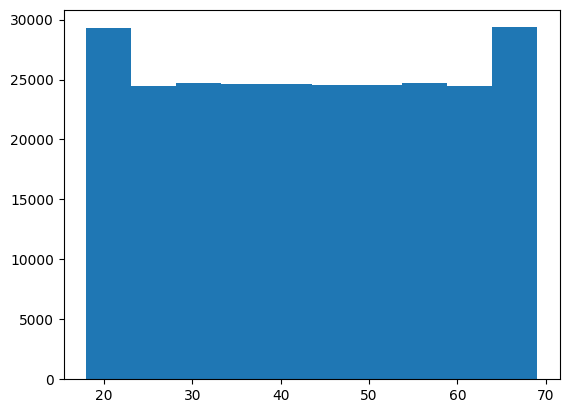

Income


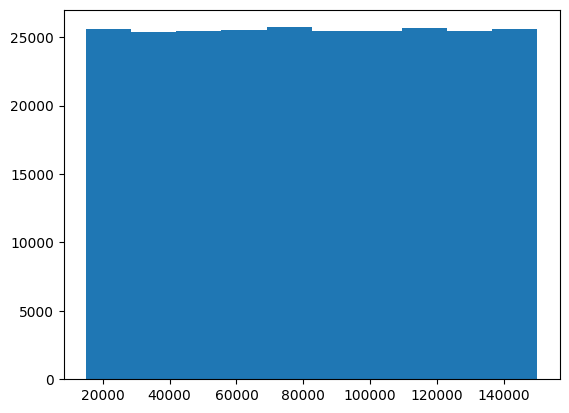

LoanAmount


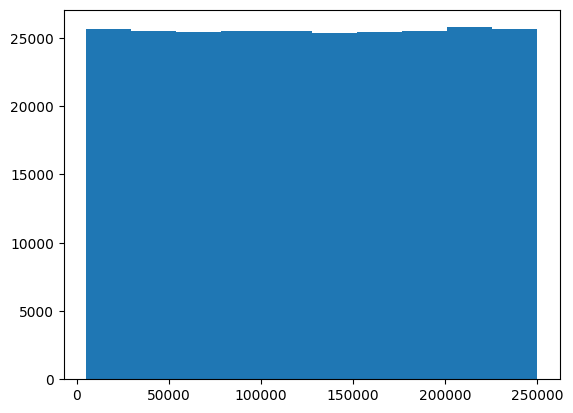

CreditScore


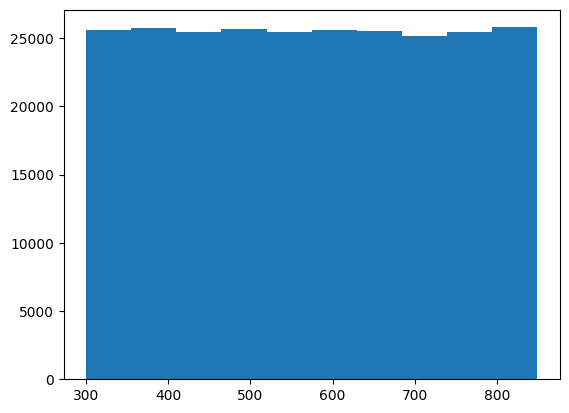

MonthsEmployed


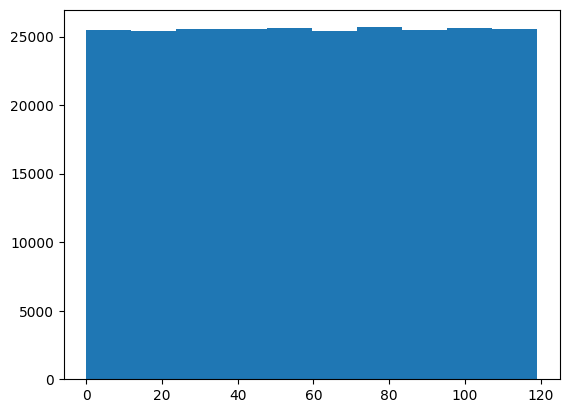

NumCreditLines


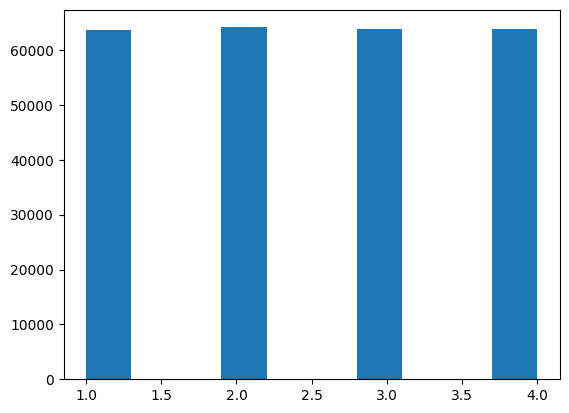

InterestRate


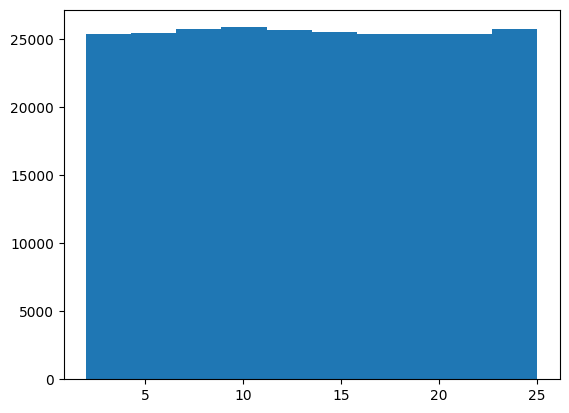

LoanTerm


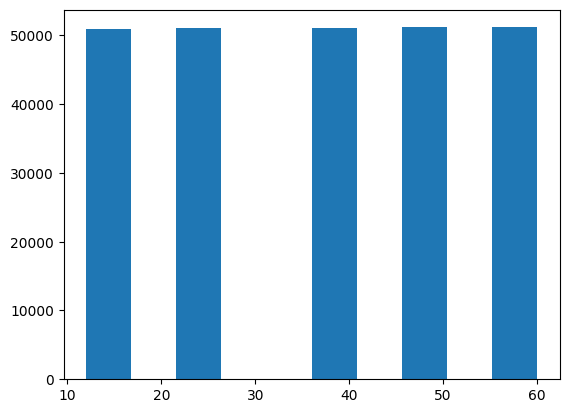

DTIRatio


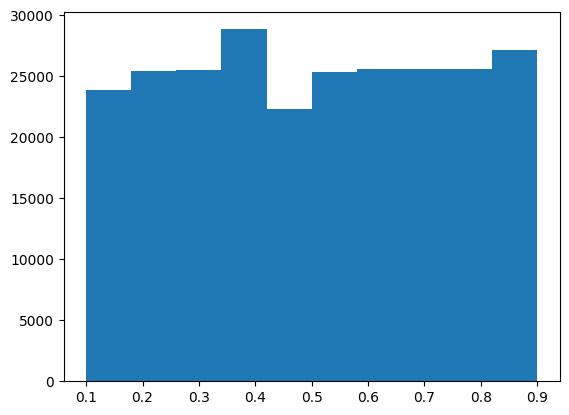

Default


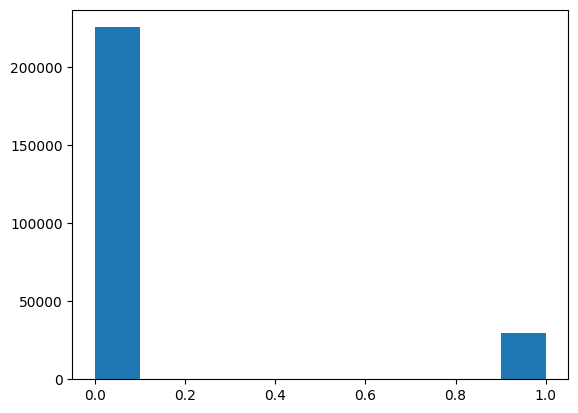

In [11]:
for i in data.select_dtypes(include='number').columns:
  print(i)
  plt.hist(data[i])
  plt.show()

Age


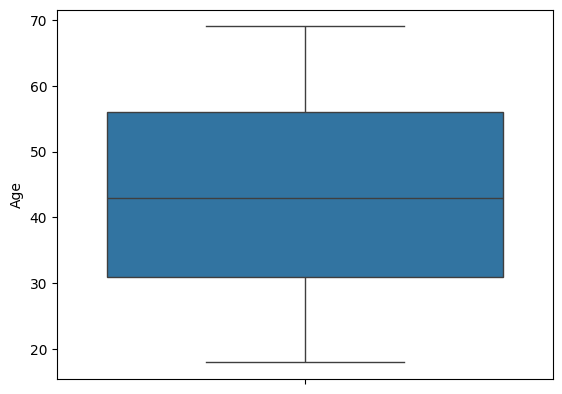

Income


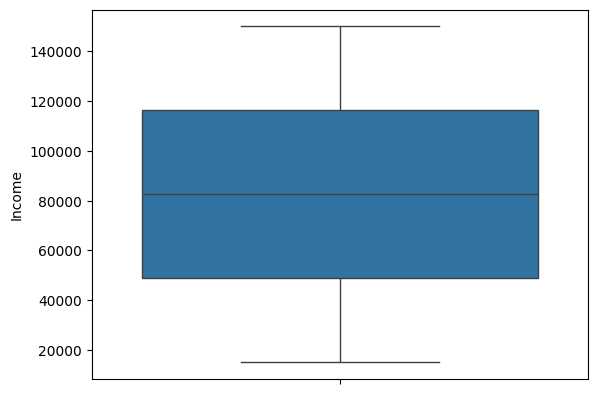

LoanAmount


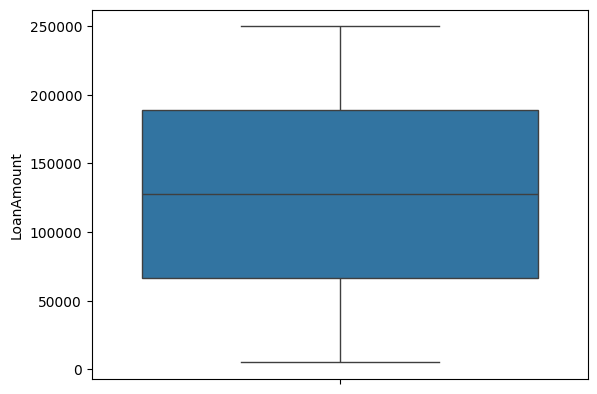

CreditScore


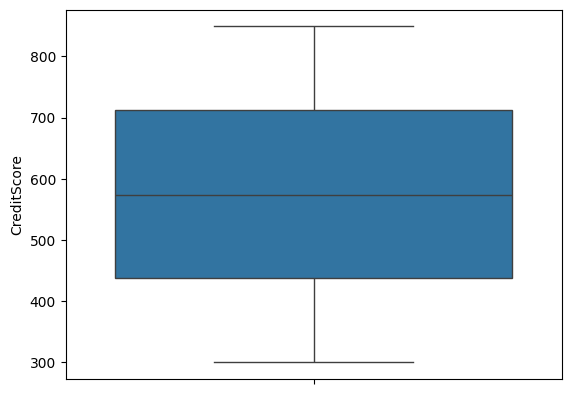

MonthsEmployed


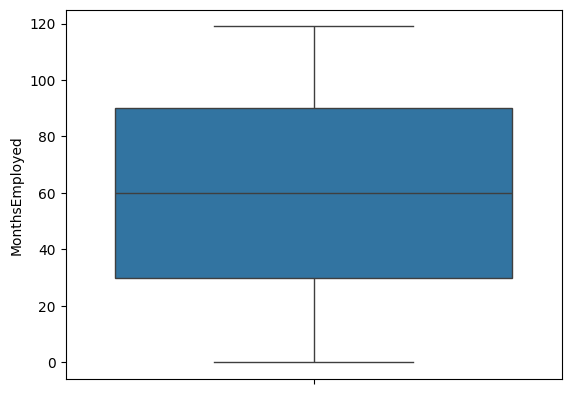

NumCreditLines


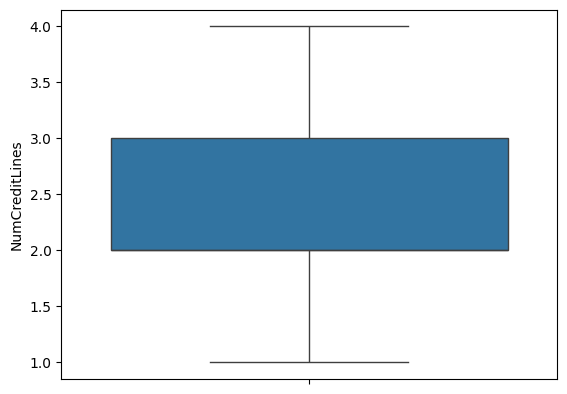

InterestRate


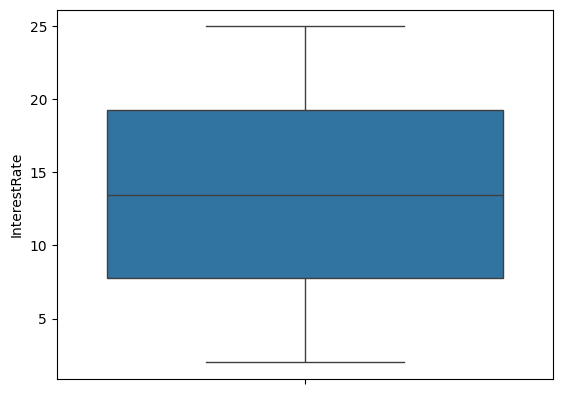

LoanTerm


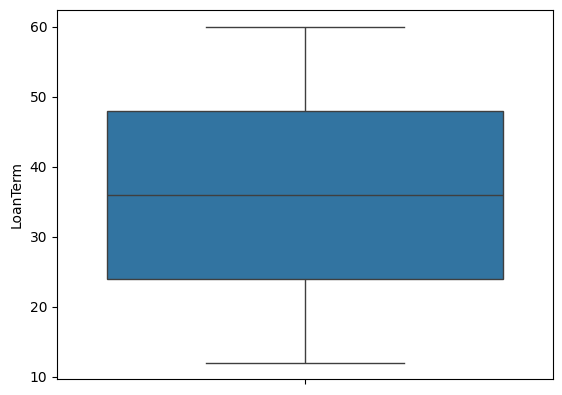

DTIRatio


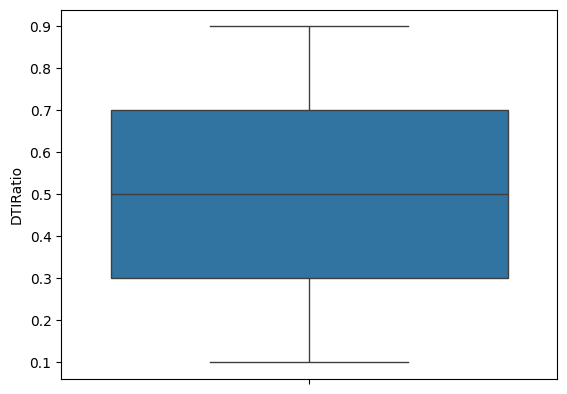

Default


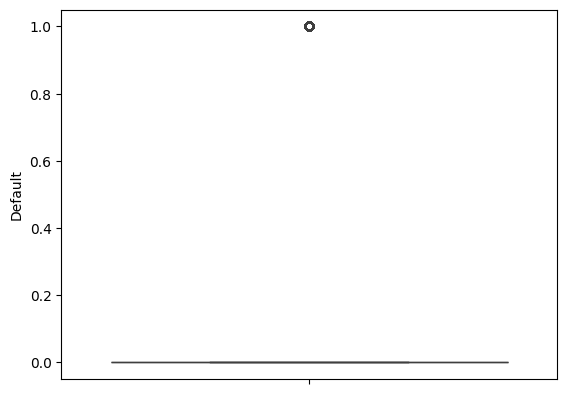

In [12]:
for i in data.select_dtypes(include="number").columns:
  print(i)
  sns.boxplot(data[i])
  plt.show()

Education


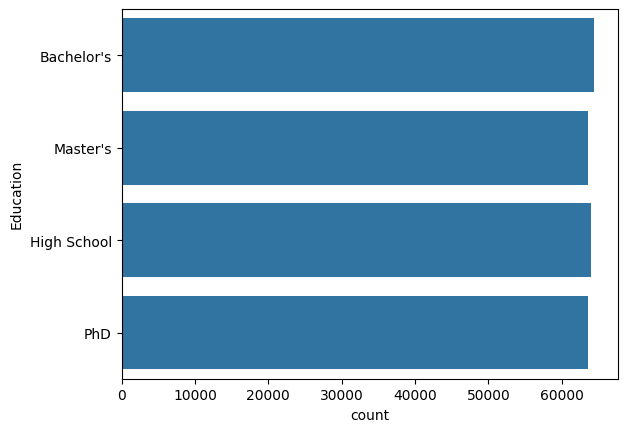

EmploymentType


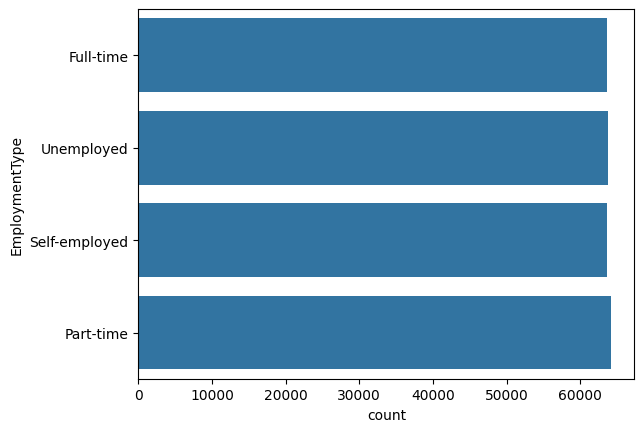

MaritalStatus


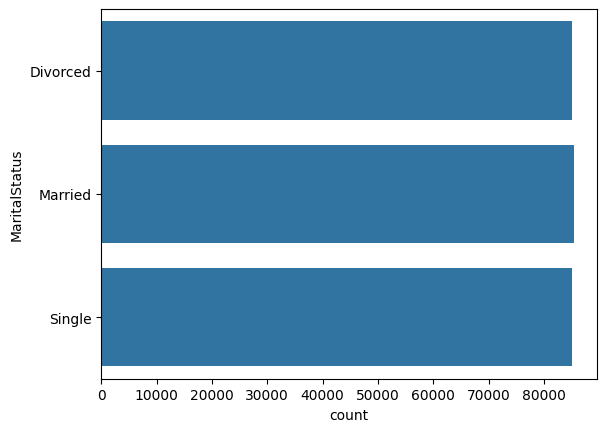

HasMortgage


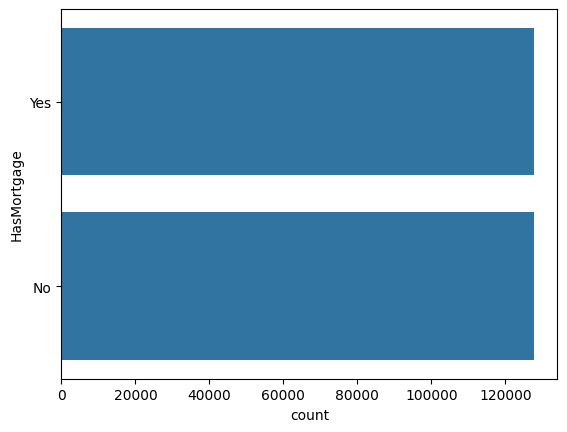

HasDependents


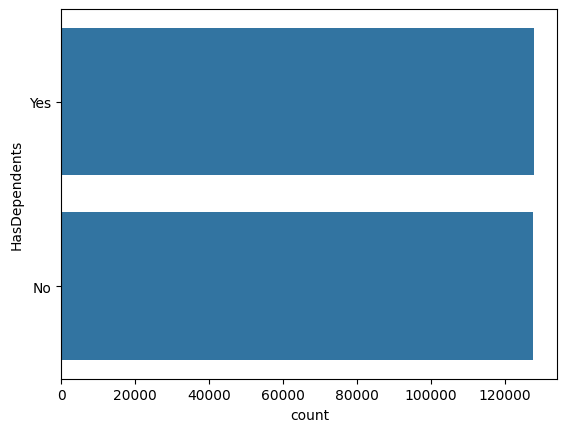

LoanPurpose


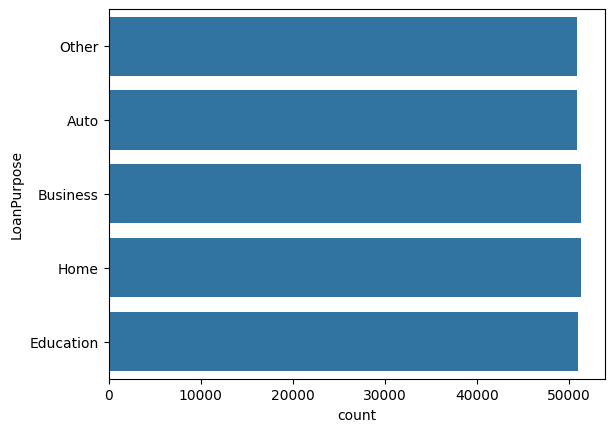

HasCoSigner


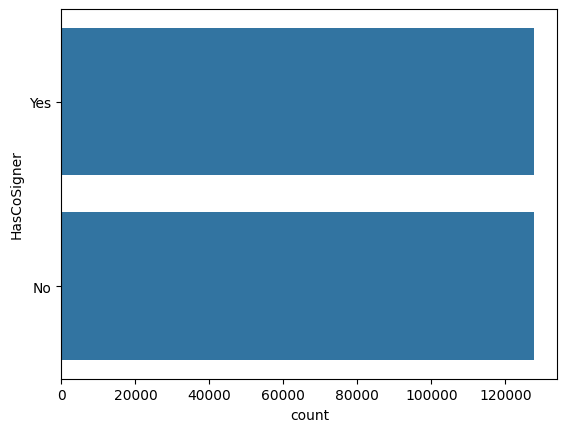

In [13]:
for i in data.select_dtypes(include='object').columns:
  print(i)
  sns.countplot(data[i])
  plt.show()

In [14]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [15]:
data.isna().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


In [16]:
x=data.drop('Default',axis=1)
y=data['Default']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
x_train.shape

(204277, 16)

In [19]:
x_test.shape

(51070, 16)

In [20]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in x_train.select_dtypes(include='object').columns:
  x_train[i]=enc.fit_transform(x_train[i])
  x_test[i]=enc.transform(x_test[i])

In [21]:
x_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
151646,65,92739,180971,753,52,3,3.79,24,0.87,3,1,0,1,0,0,1
193529,62,93980,118534,669,1,1,13.94,24,0.81,0,2,1,1,0,4,1
140818,39,127925,76852,438,24,3,18.33,36,0.11,1,1,0,0,0,1,0
165537,37,59841,69792,458,37,2,4.24,24,0.23,3,1,2,1,0,3,0
84290,56,135781,231125,782,9,1,2.06,48,0.39,3,0,1,1,1,3,0


In [22]:
x_test.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
91816,56,109663,107028,498,9,3,18.48,12,0.45,1,2,1,1,1,0,0
140989,56,129151,233093,610,48,3,10.03,36,0.51,2,3,1,0,0,4,0
57275,34,43087,162002,623,31,2,22.26,60,0.58,0,1,1,1,1,2,1
130235,40,63747,120320,590,14,3,4.73,60,0.13,3,0,1,0,0,1,1
244648,48,124406,222023,784,106,3,9.82,24,0.42,1,0,2,1,1,1,1


In [23]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204277 entries, 151646 to 199340
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             204277 non-null  int64  
 1   Income          204277 non-null  int64  
 2   LoanAmount      204277 non-null  int64  
 3   CreditScore     204277 non-null  int64  
 4   MonthsEmployed  204277 non-null  int64  
 5   NumCreditLines  204277 non-null  int64  
 6   InterestRate    204277 non-null  float64
 7   LoanTerm        204277 non-null  int64  
 8   DTIRatio        204277 non-null  float64
 9   Education       204277 non-null  int64  
 10  EmploymentType  204277 non-null  int64  
 11  MaritalStatus   204277 non-null  int64  
 12  HasMortgage     204277 non-null  int64  
 13  HasDependents   204277 non-null  int64  
 14  LoanPurpose     204277 non-null  int64  
 15  HasCoSigner     204277 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 26.5 MB


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [25]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [26]:
x_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,1.434161,0.262555,0.754373,1.123820,-0.217583,0.447773,-1.461977,-0.708922,1.601178,1.346243,-0.448524,-1.225480,0.998254,-0.999193,-1.415716,0.998664
1,1.234224,0.294391,-0.127246,0.594775,-1.689796,-1.343837,0.068076,-0.708922,1.341227,-1.334820,0.446933,-0.000336,0.998254,-0.999193,1.414933,0.998664
2,-0.298627,1.165189,-0.715802,-0.860099,-1.025857,0.447773,0.729843,-0.001565,-1.691540,-0.441133,-0.448524,-1.225480,-1.001749,-0.999193,-0.708054,-1.001337
3,-0.431918,-0.581384,-0.815490,-0.734136,-0.650587,-0.448032,-1.394142,-0.708922,-1.171637,1.346243,-0.448524,1.224808,0.998254,-0.999193,0.707271,-1.001337
4,0.834350,1.366720,1.462555,1.306467,-1.458860,-1.343837,-1.722764,0.705792,-0.478433,1.346243,-1.343982,-0.000336,0.998254,1.000808,0.707271,-1.001337


In [27]:
x_test.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.834350,0.696710,-0.289713,-0.482209,-1.458860,0.447773,0.752455,-1.416279,-0.218482,-0.441133,0.446933,-0.000336,0.998254,1.000808,-1.415716,-1.001337
1,0.834350,1.196640,1.490343,0.223184,-0.333051,0.447773,-0.521333,-0.001565,0.041469,0.452555,1.342390,-0.000336,-1.001749,-0.999193,1.414933,-1.001337
2,-0.631855,-1.011177,0.486528,0.305060,-0.823788,-0.448032,1.322267,1.413149,0.344746,-1.334820,-0.448524,-0.000336,0.998254,1.000808,-0.000391,0.998664
3,-0.231981,-0.481182,-0.102028,0.097221,-1.314526,0.447773,-1.320277,1.413149,-1.604890,1.346243,-1.343982,-0.000336,-1.001749,-0.999193,-0.708054,0.998664
4,0.301184,1.074915,1.334033,1.319063,1.341230,0.447773,-0.552990,-0.708922,-0.348458,-0.441133,-1.343982,1.224808,0.998254,1.000808,-0.708054,0.998664


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [30]:
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))

LogisticRegression()
0.88363031133738
[[44942   120]
 [ 5823   185]]
RandomForestClassifier()
0.8839827687487762
[[44876   186]
 [ 5739   269]]
DecisionTreeClassifier()
0.8020755825337772
[[39582  5480]
 [ 4628  1380]]
KNeighborsClassifier()
0.8728803602897983
[[44146   916]
 [ 5576   432]]
AdaBoostClassifier()
0.8840610926179753
[[44907   155]
 [ 5766   242]]
GradientBoostingClassifier()
0.8846289406696691
[[44889   173]
 [ 5719   289]]


In [32]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
preds=model.predict(x_test)

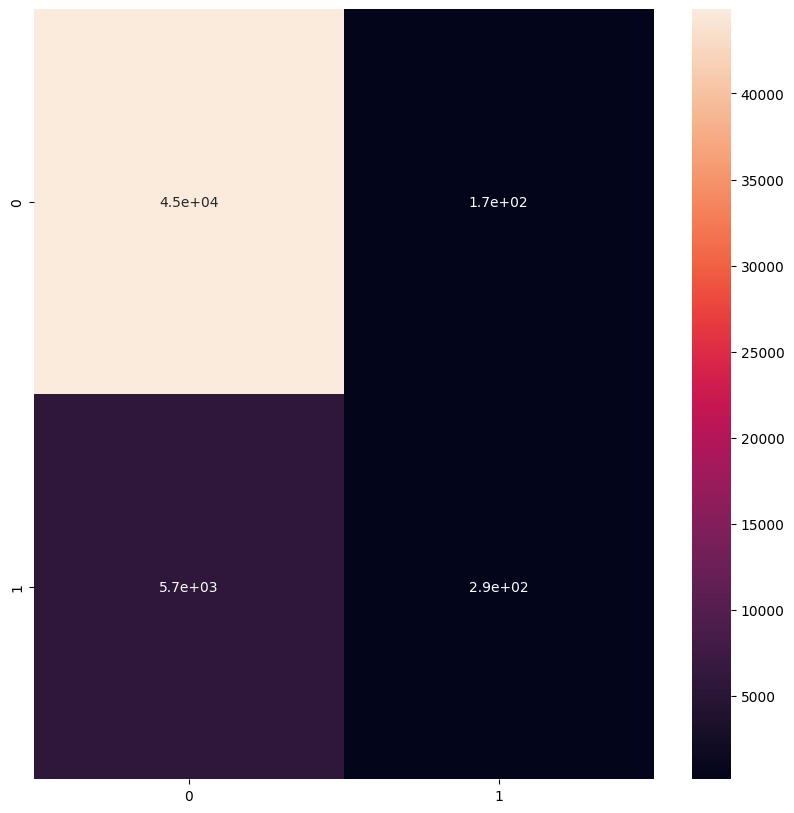

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,preds),annot=True)
plt.show()